In [206]:
## 导入库
import numpy as np
import pandas as pd
from datetime import datetime, timedelta# 导入必要的库
from scipy.stats import chisquare, ks_2samp, gaussian_kde
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [168]:
list_match = ["2023-wimbledon-1301","2023-wimbledon-1302","2023-wimbledon-1303","2023-wimbledon-1304",
              "2023-wimbledon-1305","2023-wimbledon-1306","2023-wimbledon-1307","2023-wimbledon-1308",
              "2023-wimbledon-1309","2023-wimbledon-1310","2023-wimbledon-1311","2023-wimbledon-1312",
             "2023-wimbledon-1313","2023-wimbledon-1314","2023-wimbledon-1315","2023-wimbledon-1401",
             "2023-wimbledon-1402","2023-wimbledon-1403","2023-wimbledon-1404","2023-wimbledon-1405",
             "2023-wimbledon-1406","2023-wimbledon-1407","2023-wimbledon-1408","2023-wimbledon-1409",
             "2023-wimbledon-1501","2023-wimbledon-1502","2023-wimbledon-1503","2023-wimbledon-1504",
             "2023-wimbledon-1601","2023-wimbledon-1602","2023-wimbledon-1701"]

In [185]:
list_match =["2023-wimbledon-1314"]

# 问题一

### 数据处理

### TOPSIS模型建立

In [ ]:
## TOPSIS代码

### 数据可视化

In [8]:
# 打开excel文件
excel_file_path = ".\第一问\TOPSIS.xlsx"
# 读取Excel文件
df = pd.read_excel(excel_file_path)

# 预览数据
# 统计摘要信息
print(df.columns)


Index(['player1', 'match_id', 'last_time', 'set_no', 'game_no', 'point_no',
       'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_score', 'p2_score',
       'server', 'serve_no', 'point_victor', 'p1_points_won', 'p2_points_won',
       'game_victor', 'set_victor', 'p1_ace', 'p1_winner', 'winner_shot_type',
       'p1_double_fault', 'p1_unf_err', 'p1_net_pt', 'p1_net_pt_won',
       'p1_break_pt', 'p1_break_pt_won', 'p1_break_pt_missed',
       'p1_distance_run', 'rally_count', 'speed_mph', 'serve_width_encoded',
       'serve_depth_encoded', 'return_depth_encoded', 'rally_speed',
       'run_speed', 'get_point_speed', 'point_get_rate', 'is_tie_breakers',
       'runs_won', 'runs_fail', 'rate_score', 'get_point_speed.1',
       'TOPSIS_humdred marks'],
      dtype='object')


In [167]:
# 制作图表

# # 获取该列的所有不重复的数据并进行统计
# unique_values_count = df['match_id'].value_counts()
# # 输出结果
# print(unique_values_count)

def draw(df,match_id):
    player1=[]
    player2=[]
    # 获取当前比赛数据
    df_aim = df[df["match_id"] == match_id]
    topsis_socre_list=list(df_aim["TOPSIS_humdred marks"].values) #'rate_score'/ 'p1_points_won'
    # topsis_socre_list=list(df_aim['rate_score'].values) #'rate_score'/ 'p1_points_won'
    # topsis_socre_list=list(df_aim['p1_points_won'].values) #'rate_score'/ 'p1_points_won'
    
    players_name_list=list(df_aim["player1"].values)
    players= list(dict(df_aim['player1'].value_counts()).keys())
    for i in range(0,len(topsis_socre_list)):
        if players_name_list[i] == players[0] :
            player1.append(topsis_socre_list[i])
        elif players_name_list[i] == players[1] :
            player2.append(topsis_socre_list[i])
        else:
            print('error')
                
    # 找到最大的长度
    if len(player1) >= len(player2) :
        length=len(player1)
        length_name=players[0]
    else :
        length=len(player2)
        length_name=players[1]
    # length = max(len(player1), len(player2))

    # 使用numpy.pad来保证y1和y2的长度相同
    player1_padded = np.pad(player1, (0, length - len(player1)), constant_values=np.nan)
    player2_padded = np.pad(player2, (0, length - len(player2)), constant_values=np.nan)
    # print(len(player1_padded),len(player2_padded),len(range(0, length + 1)))

    # 创建DataFrame
    data = {'x': range(1, length + 1), 'player1': player1_padded, 'player2': player2_padded}
    dat = pd.DataFrame(data)

    # 设置颜色和线型
    colors = ['red', 'blue']
    linestyles = ['-', '-',]
    
    # 绘制折线图
    plt.figure(figsize=(8, 6))  # 设置图形大小
    for i, column in enumerate(['player1', 'player2']):
        plt.plot(dat['x'], dat[column], label=column, color=colors[i], linestyle=linestyles[i])

    # 添加图例
    plt.legend(loc='lower left', labels=[players[0], players[1]], title=f'{players[0]} VS {players[1]}', frameon=False, facecolor='lightgray',bbox_to_anchor=(0.02, 0.15))

    # 添加标签和标题
    plt.xlabel('Number')
    plt.ylabel('TOPSIS Score')
    plt.title(f'{match_id} Contestant Performance')
    
    try:
        plot(df_aim,dat,length_name,players)
    except:
        pass

    # 显示图形
    plt.grid(True)
    plt.show()


In [170]:
#绘制盘/局直方图
def plot(df_aim,dat,length_name,players):
    set_list=[]
    game_list=[]
    # 获取当前比赛数据
    set_no=list(df_aim['set_no'].values*10) #'set_no', 'game_no'
    game_no=list(df_aim['game_no'].values) #'set_no', 'game_no'
    
    players_name_list=list(df_aim["player1"].values)

    for i in range(0,len(set_no)):
        if players_name_list[i] == length_name :
            set_list.append(set_no[i])
            game_list.append(game_no[i])

    # player1_padded = np.pad(player1, (0, length - len(player1)), constant_values=np.nan)
    data = {'x': range(1, len(set_list) + 1), 'set': set_list, 'game': game_list}
    dat = pd.DataFrame(data)

    colors = ['lightgray', 'gray']
    # 绘制直方图
    for i, column in enumerate(['set', 'game']):
        plt.bar(dat['x'], dat[column], label=column, color=colors[i],  alpha=0.5, align='center')
        
    # 添加图例
    plt.legend(loc='lower left',labels=[players[0], players[1],'Set','Game'],  title=f'{players[0]} VS {players[1]}',frameon=False,bbox_to_anchor=(0.02, 0.15))





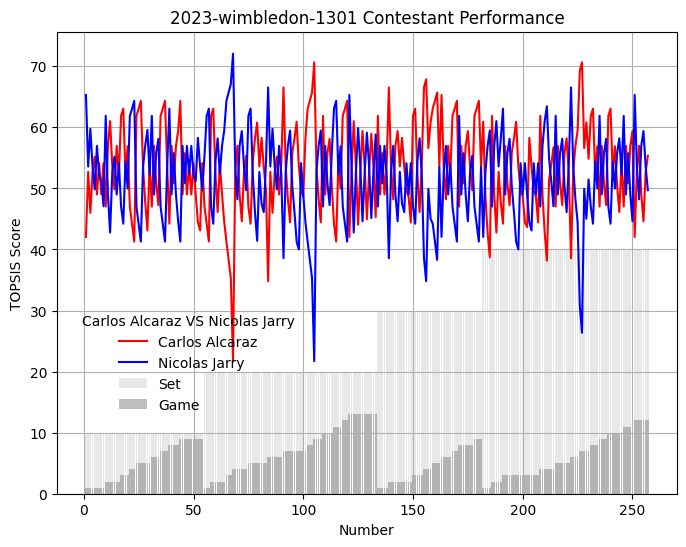

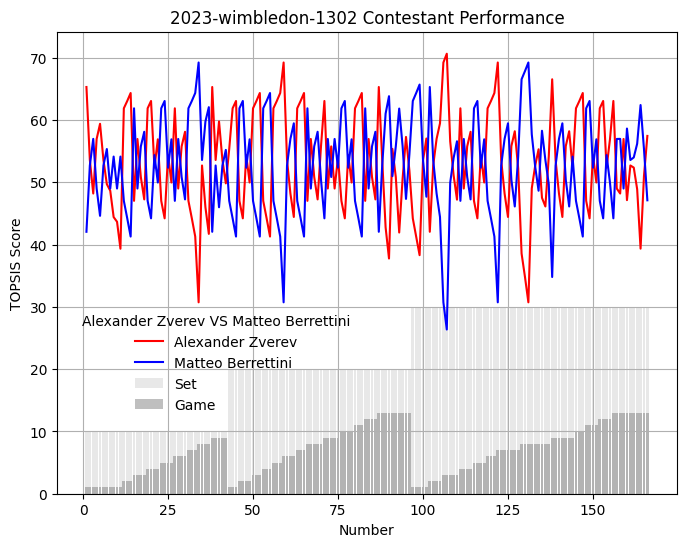

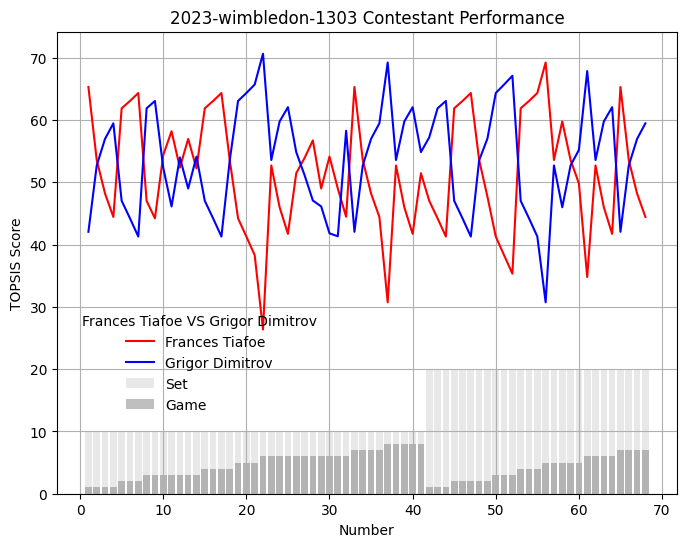

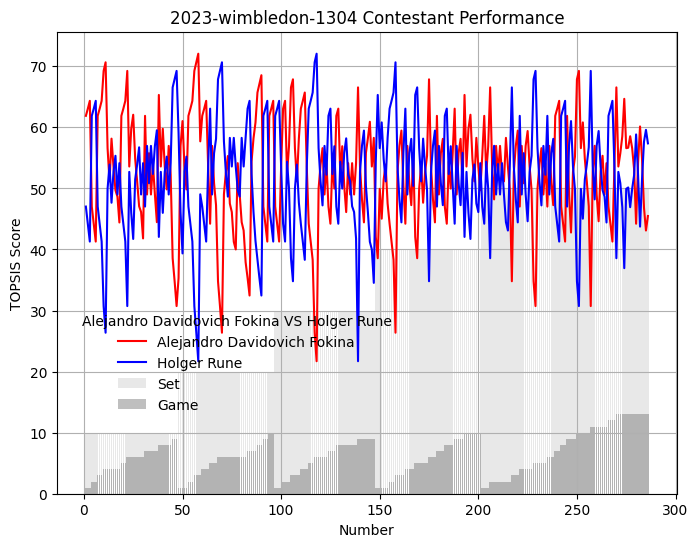

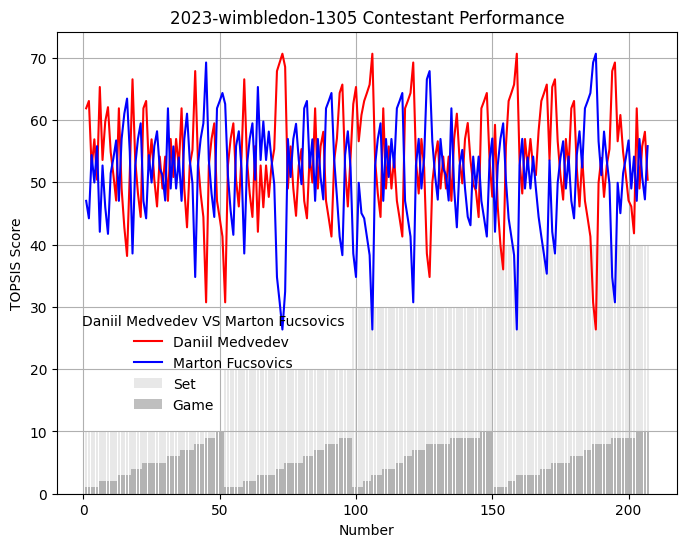

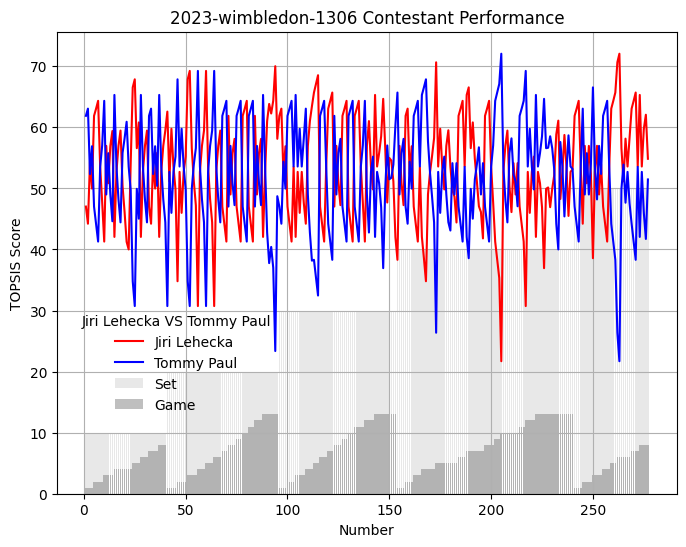

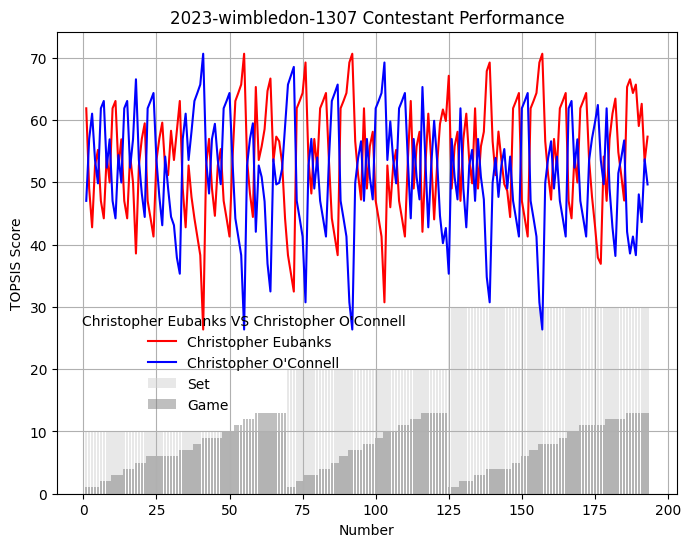

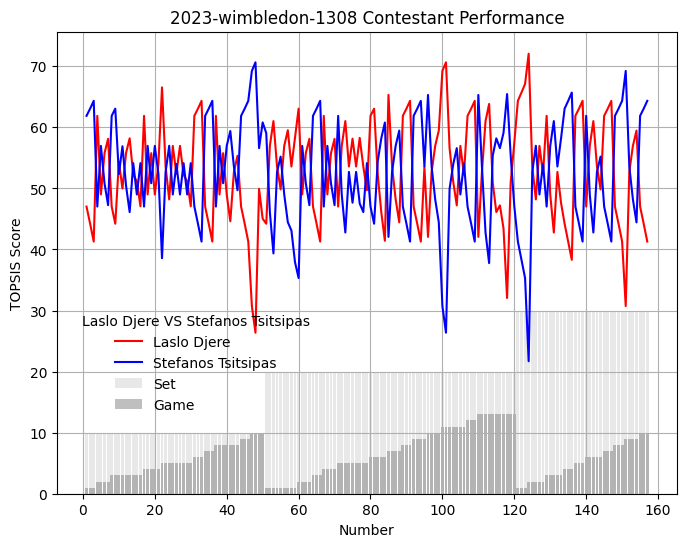

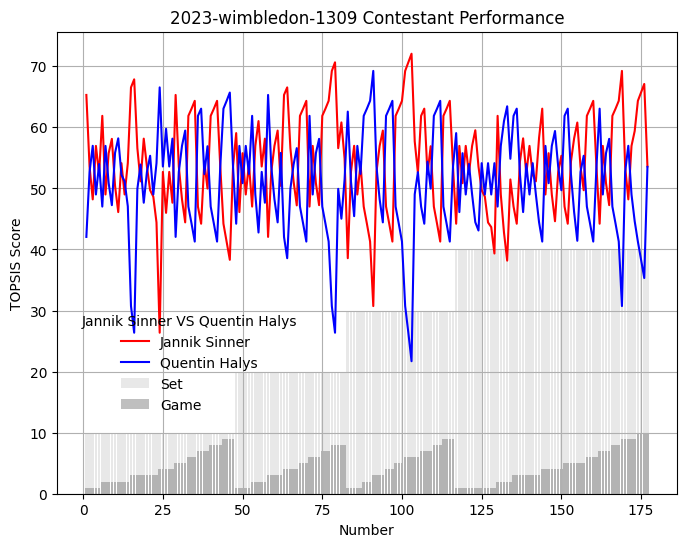

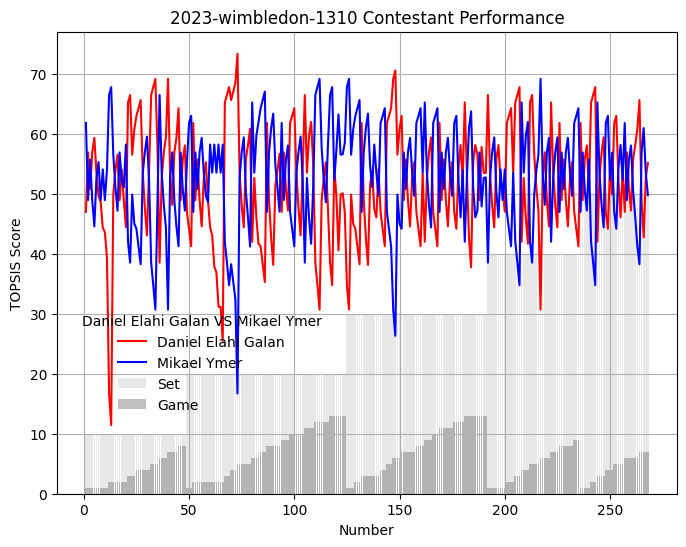

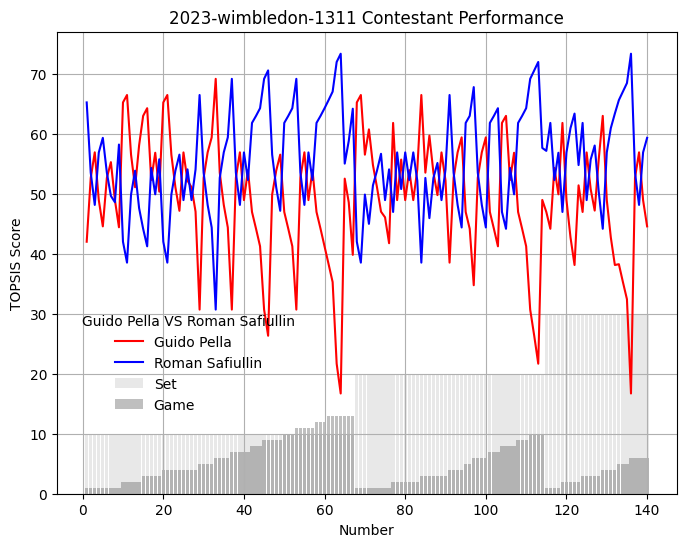

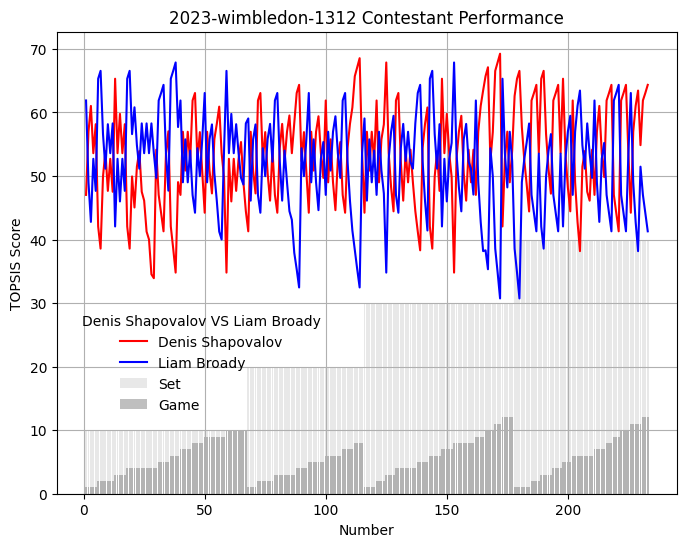

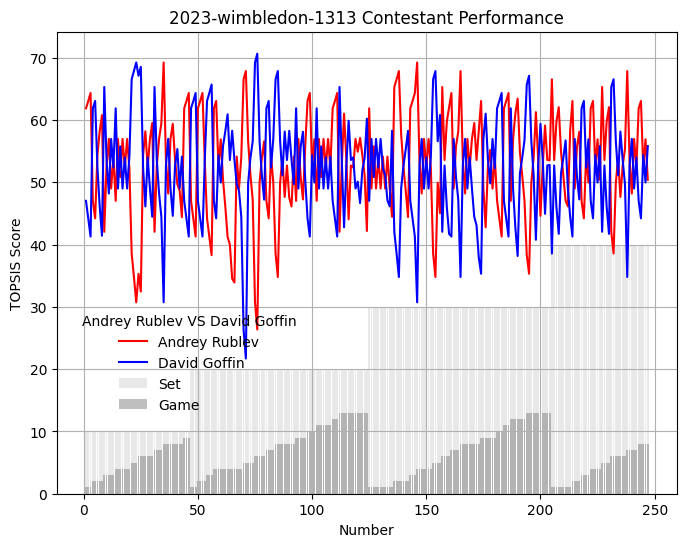

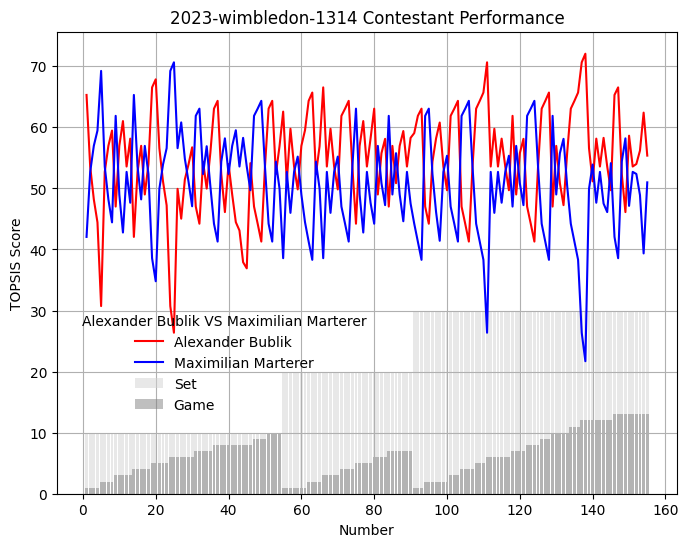

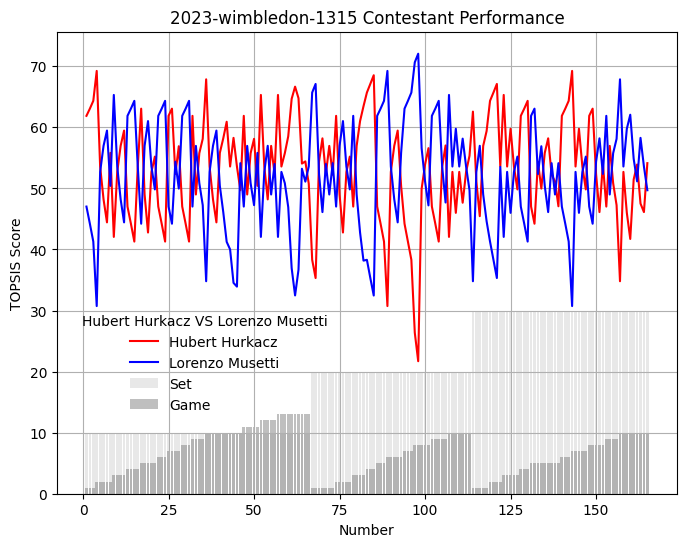

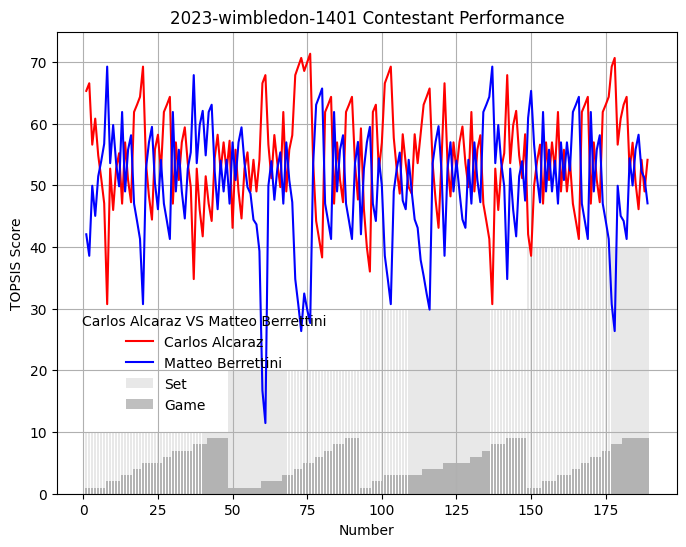

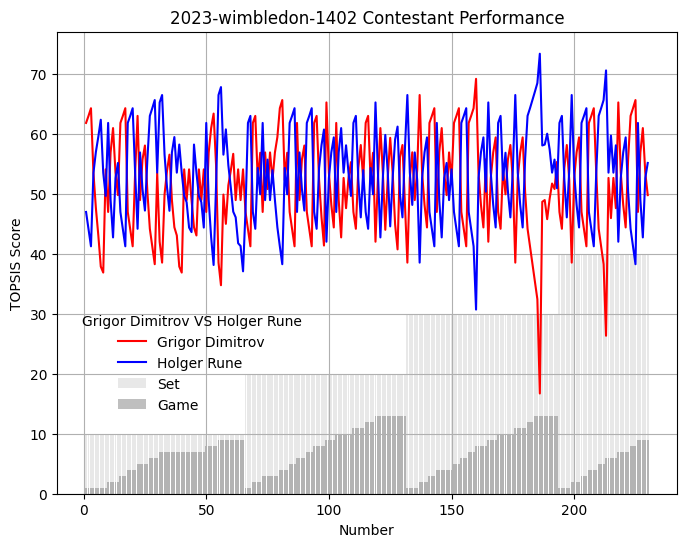

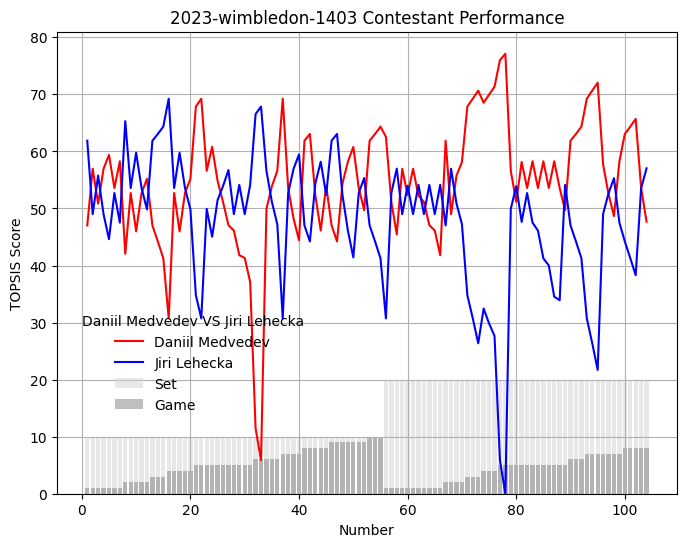

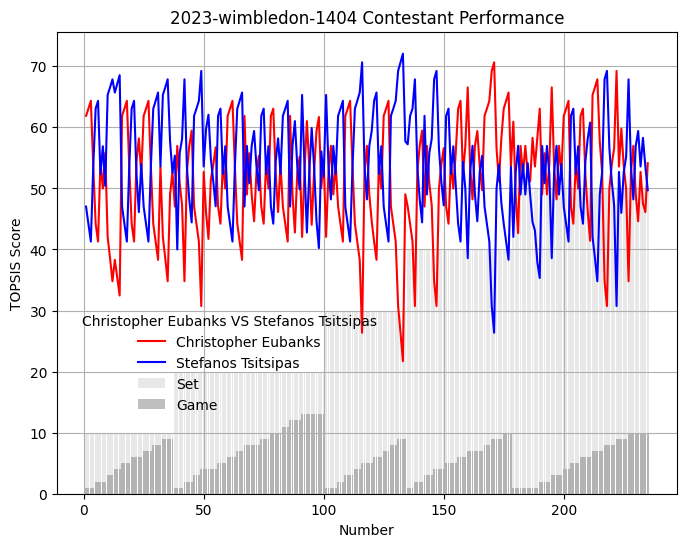

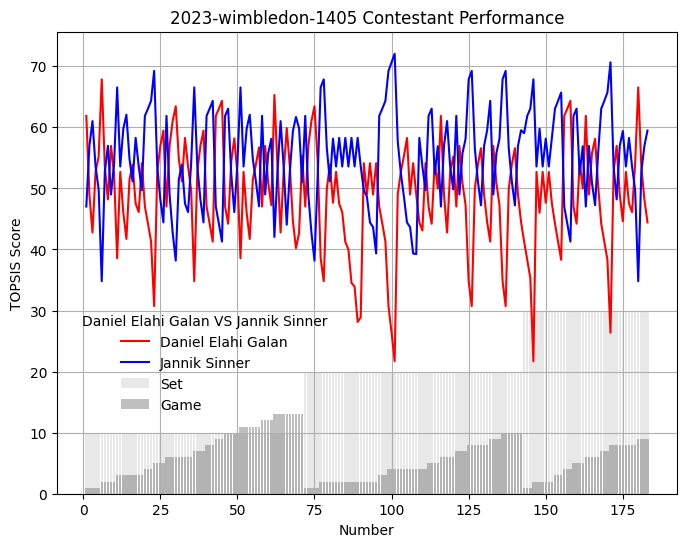

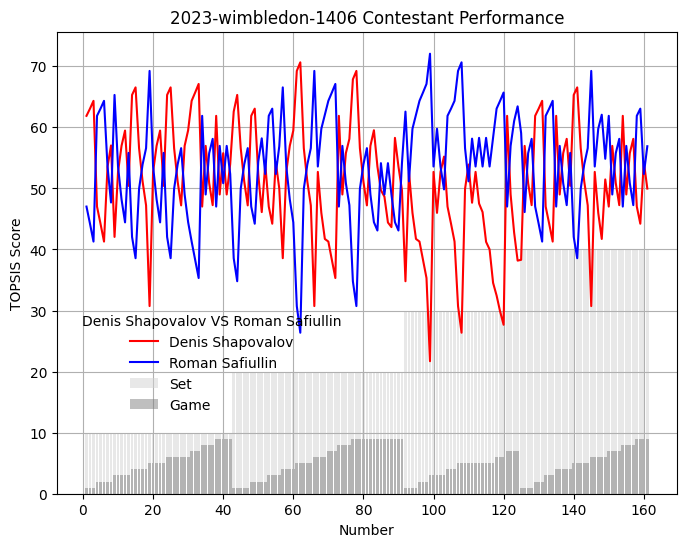

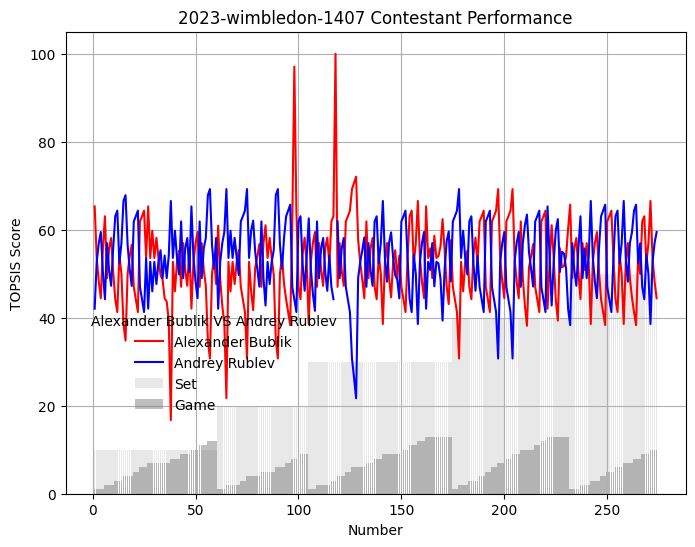

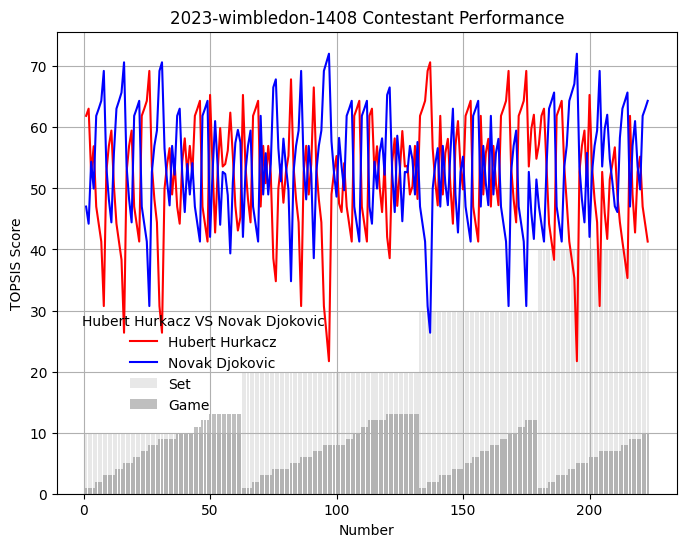

IndexError: list index out of range

In [171]:
# 遍历比赛列表
for j in list_match:
    match_id=j
    draw(df,match_id)

# 问题二

### 随机性检验

0        0
1        1
2        0
3        1
4        2
        ..
12103    1
12104    0
12105    0
12106    1
12107    0
Name: runs_won, Length: 12108, dtype: int64
Chi-squared Statistic: 218046.57893718657, p-value: 0.0
KS Statistic: 0.49677898909811696, p-value: 0.0


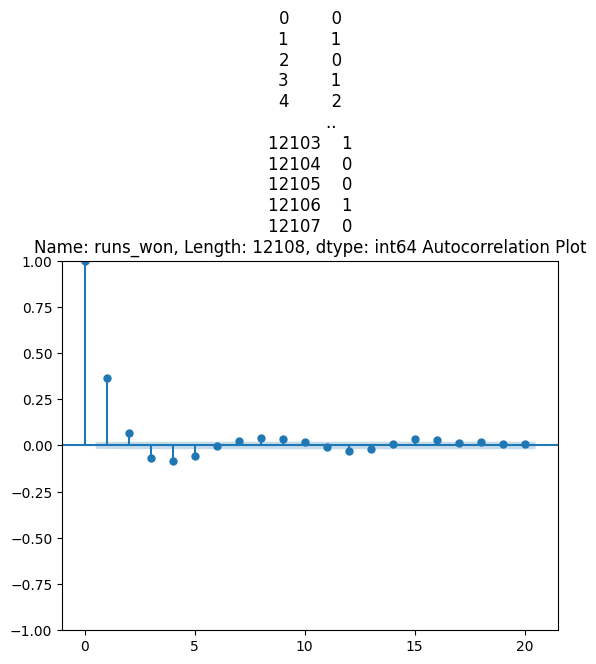

In [214]:
# 获取观测数据列
observed_data = df['runs_won'] #runs_won  get_point_speed.1

# 卡方检验
# 使用实际数据的核密度估计来生成期望数据，避免了零值的问题
kde = gaussian_kde(observed_data)
expected_data = kde.resample(size=len(observed_data))[0]

# 归一化期望数据，使其和与观测数据的和相等
expected_data = expected_data * (observed_data.sum() / expected_data.sum())

# 进行卡方检验
chi2_stat, p_value = chisquare(observed_data, expected_data)
# 打印卡方统计量和p值
print(f"Runs_of_Won \nChi-squared Statistic: {chi2_stat}, p-value: {p_value}")

# Kolmogorov-Smirnov检验
# 生成与观测数据大小相同的随机正态分布数据
expected_data_ks = np.random.normal(size=len(observed_data))
# 进行Kolmogorov-Smirnov检验
ks_stat, ks_p_value = ks_2samp(observed_data, expected_data_ks)
# 打印KS统计量和p值
print(f"KS Statistic: {ks_stat}, p-value: {ks_p_value}")

# 绘制自相关图
sm.graphics.tsa.plot_acf(observed_data, lags=20)
# 设置图标题
plt.title('Runs of Won Autocorrelation Plot')
# 展示图形
plt.show()



Get Point Speed 
Chi-squared Statistic: 4.913149350773626e+17, p-value: 0.0
KS Statistic: 0.5008259002312521, p-value: 0.0


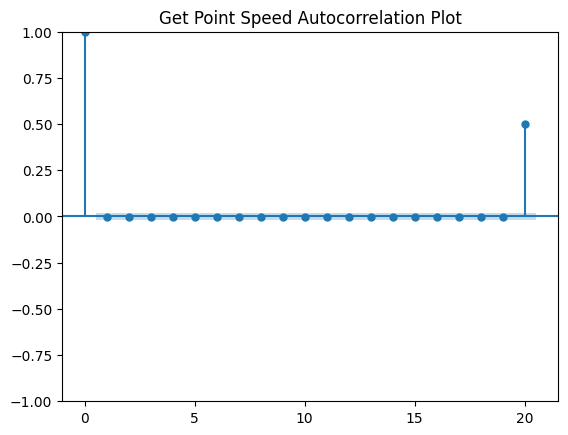

In [215]:
# 获取观测数据列
observed_data = df['get_point_speed.1'] #runs_won  get_point_speed.1
df['get_point_speed.1'].fillna(method='bfill', inplace=True)  # 使用后一个值填充

# 卡方检验
# 生成与观测数据大小相同的随机正态分布数据
expected_data = np.random.normal(loc=observed_data.mean(),size=len(observed_data))
# 进行卡方检验
chi2_stat, p_value = chisquare(observed_data, expected_data)
# 打印卡方统计量和p值
print(f"Get Point Speed \nChi-squared Statistic: {chi2_stat}, p-value: {p_value}")

# Kolmogorov-Smirnov检验
# 生成与观测数据大小相同的随机正态分布数据
expected_data_ks = np.random.normal(size=len(observed_data))
# 进行Kolmogorov-Smirnov检验
ks_stat, ks_p_value = ks_2samp(observed_data, expected_data_ks)
# 打印KS统计量和p值
print(f"KS Statistic: {ks_stat}, p-value: {ks_p_value}")

# 绘制自相关图
sm.graphics.tsa.plot_acf(observed_data, lags=20)
# 设置图标题
plt.title('Get Point Speed Autocorrelation Plot')
# 展示图形
plt.show()

### 画图

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw(df, match_id):
    speed = []
    runs_won = []
    marks = []

    # 获取当前比赛数据
    df_aim = df[df["match_id"] == match_id]
    topsis_score_list = list(df_aim["TOPSIS_humdred marks"].values)
    speed_list = list(df_aim['get_point_speed.1'].values*10)
    runs_won_list = list(df_aim['runs_won'].values*10)

    players_name_list = list(df_aim["player1"].values)
    players = list(dict(df_aim['player1'].value_counts()).keys())
    
    for i in range(0, len(speed_list)):
        if players_name_list[i] == players[0]:
            speed.append(speed_list[i])
            runs_won.append(runs_won_list[i])
            marks.append(topsis_score_list[i])
        elif players_name_list[i] == players[1]:
            continue
        else:
            print('error')

    # 找到最大的长度
    length = max(len(speed), len(runs_won), len(marks))

    # 使用列表推导式来保证y1和y2的长度相同
    speed_padded = speed + [np.nan] * (length - len(speed))
    runs_won_padded = runs_won + [np.nan] * (length - len(runs_won))
    marks_padded = marks + [np.nan] * (length - len(marks))

    # 创建DataFrame
    data = {'x': range(1, length + 1), 'speed': speed_padded, 'runs_won': runs_won_padded, 'marks': marks_padded}
    dat = pd.DataFrame(data)

    # 设置颜色和线型
    colors = ['red', 'blue', 'green']
    linestyles = ['-', '-', '--']

    # 绘制折线图
    plt.figure(figsize=(8, 6))  # 设置图形大小
    for i, column in enumerate(['speed', 'runs_won', 'marks']):
        plt.plot(dat['x'], dat[column], label=column, color=colors[i], linestyle=linestyles[i])

    # 添加图例
    plt.legend()

    # 添加标签和标题
    plt.xlabel('Number')
    plt.ylabel('TOPSIS Score')
    plt.title(f'{match_id} Contestant Performance')

    # 显示图形
    plt.grid(True)
    plt.show()



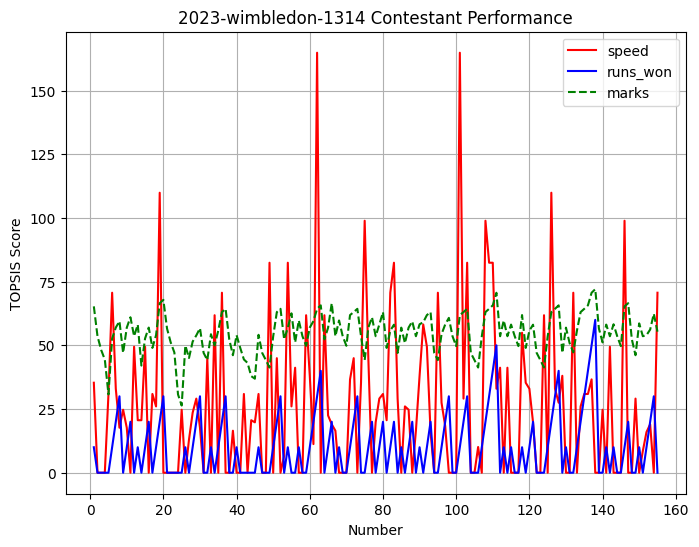

In [187]:
# 遍历比赛列表
for j in list_match:
    match_id=j
    draw(df,match_id)

# 问题三